# Assignment 5 

Maximum likelihood estimator for the exponential distribution.

Assume you observe a random sample of size $n$ from the exponential pdf. Remember that the exponential pdf is given by $f_{X}(x)=\lambda e^{-\lambda x}$ for $x>0$. Let $x_{1}, x_{2}, \dots x_{n}$ denote the sample.

1. Construct the likelihood and log-likelihood functions for the exponential pdf

Given that the realizations in the random sample are independent, the probability of observing the sequence $x_{1}, x_{2}, \dots, x_{n}$ is given by the product of the probabilities of observing each $x_{i}$. Therefore, the likelihood function is 

$\begin{aligned} L\left(\lambda ; x_{1}, \ldots, x_{n}\right) &=\prod_{j=1}^{n} f_{X}\left(x_{j} ; \lambda\right) \\ &=\prod_{j=1}^{n} \lambda e^{-\lambda x_{j}} \\ &=\lambda^{n} e^{-\lambda \sum_{j=1}^{n} x_{j}}
\end{aligned}$

The log-likelihood function is given by

$ln L\left(\lambda ; x_{1}, \ldots, x_{n}\right)=n \ln (\lambda)-\lambda \sum_{j=1}^{n} x_{j}$

2. Find the maximum likelihood estimator for $\lambda$. Denote the estimator $\lambda_{e}$.

Using the first order condition for a maximum on the log-likelihood function

$$\frac{d}{d \lambda} ln L\left(\lambda ; x_{1}, \ldots, x_{n}\right)=0$$

Therefore 

$$\begin{aligned} \frac{d}{d \lambda} ln L\left(\lambda ; x_{1}, \ldots, x_{n}\right) &=\frac{d}{d \lambda}\left(n \ln (\lambda)-\lambda \sum_{j=1}^{n} x_{j}\right) \\ &=\frac{n}{\lambda}-\sum_{j=1}^{n} x_{j} \end{aligned}$$

The Maximum Likelihood estimator is then given by

$$\lambda_{e}=\frac{n}{\sum_{j=1}^{n} x_{j}}$$

Therefore, the estimator $\lambda_{e}$ is just the reciprocal of the sample mean.

3. Create a function in R recreating the log-likelihood function you constructed in exercise 1. 

In [8]:
llikelihood <- function(l,x){
    n <- length(x)
    lnl <- n*log(l) - l*sum(x)
    return(-lnl)
}

4. Simulate a random sample from an exponential distribution with parameter $\lambda=1.5$ and $n=50$. 

In [3]:
n <- 50
l <- 1.5
x <- rexp(n, l)

5. Use the function ```optim()``` to calculate in R the value of $\lambda$ that maximizes the log likelihood function.

In [11]:
optim(1, likelihood, x = x,method="BFGS")$par

[1] 1.666465

6. Find the Maximum Likelihood estimator for different sample sizes, starting from $n=3$ to $n=100$. Plot the results for the different sample sizes using ```set.seed(42)```. *Hint:* look at the ```maximum_likelihood``` file to see a similar code. Use 0.8 as the initial value for the ```optim()``` function. 

In [21]:
samples <- 3:100
estimators <- vector()
set.seed(42)

for(n in samples){
    estimators <- append(estimators, optim(0.8, likelihood, x = rexp(n, l),method="BFGS")$par)
}

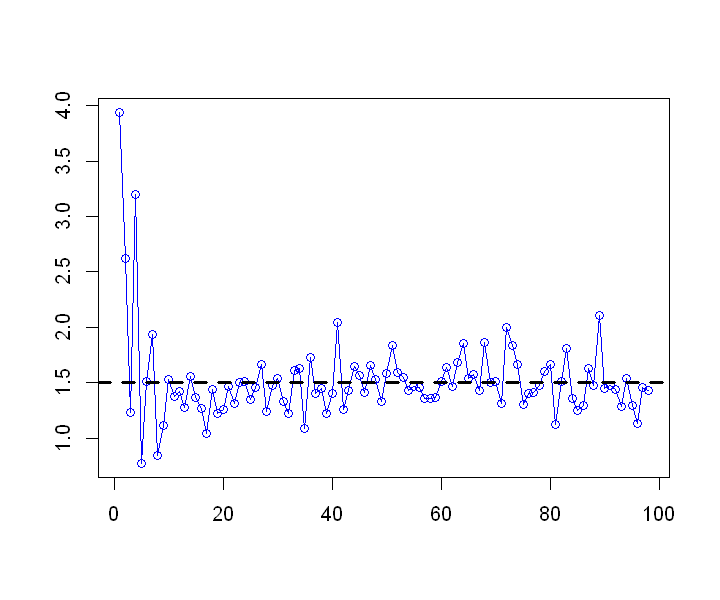

In [19]:
options(repr.plot.width=6, repr.plot.height=5)
plot(estimators,type="o", col="blue",ann=FALSE)
abline(h=l, col="black",lwd=3, lty=2)